# Base line model

### Loading and preparing the data

In [1]:
from utils.data_loader import get_flowers_dataframes, get_image_generators_from_dataframes

train_data, test_data, val_data = get_flowers_dataframes()
train_generator, test_generator, val_generator = get_image_generators_from_dataframes(train_data, test_data, val_data)

2024-01-12 20:53:54.239326: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-12 20:53:54.286778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-12 20:53:54.286819: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-12 20:53:54.288278: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-12 20:53:54.297113: I tensorflow/core/platform/cpu_feature_guar

Found 192 validated image filenames belonging to 3 classes.
Found 21 validated image filenames belonging to 3 classes.
Found 27 validated image filenames belonging to 3 classes.
Found 192 validated image filenames belonging to 3 classes.
Found 21 validated image filenames belonging to 3 classes.
Found 27 validated image filenames belonging to 3 classes.


### Defining the network architecture

In [2]:
from keras import models, layers
def build_network():
    network = models.Sequential()
    network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)))
    network.add(layers.MaxPooling2D((2, 2)))
    network.add(layers.Conv2D(64, (3, 3), activation='relu'))
    network.add(layers.MaxPooling2D((2, 2)))
    network.add(layers.Conv2D(128, (3, 3), activation='relu'))
    network.add(layers.MaxPooling2D((2, 2)))
    network.add(layers.Conv2D(128, (3, 3), activation='relu'))
    network.add(layers.MaxPooling2D((2, 2)))
    network.add(layers.Flatten())
    network.add(layers.Dense(512, activation='relu'))
    network.add(layers.Dense(3, activation='softmax'))
    network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

2024-01-15 10:51:08.538490: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-15 10:51:08.838769: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 10:51:08.838877: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 10:51:08.891934: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 10:51:08.990964: I tensorflow/core/platform/cpu_feature_guar

In [3]:
network = build_network()
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 128)       0

2024-01-15 10:51:13.518795: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:17:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-15 10:51:13.682358: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:17:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-15 10:51:13.682413: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:17:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-15 10:51:13.689227: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:17:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-15 10:51:13.689284: I external/local_xla/xla/stream_executor

### Training and evaluating

#### Multiple runs

In [3]:
from keras import backend
from utils.data_loader import get_flowers_dataframes, get_image_generators_from_dataframes

highest_accuracy = 0
average_accuracy = 0

for i in range(0, 20):
    train_data, test_data, val_data = get_flowers_dataframes(0.7, 0.15)
    train_generator, test_generator, val_generator = get_image_generators_from_dataframes(train_data, test_data, val_data)
    network = build_network()
    network.fit(train_generator, epochs=20, validation_data=val_generator)
    test_loss, test_accuracy = network.evaluate(test_generator)
    average_accuracy += test_accuracy
    if test_accuracy > highest_accuracy:
        highest_accuracy = test_accuracy
    backend.clear_session()


print("Highest accuracy: " + str(highest_accuracy))
print("Average accuracy: " + str(average_accuracy / 20))

Found 168 validated image filenames belonging to 3 classes.
Found 36 validated image filenames belonging to 3 classes.
Found 36 validated image filenames belonging to 3 classes.
Epoch 1/20
11/11 [==============================] - 2s 56ms/step - loss: 1.1830 - accuracy: 0.3452 - val_loss: 1.0433 - val_accuracy: 0.3333
Epoch 2/20
11/11 [==============================] - 1s 45ms/step - loss: 0.9587 - accuracy: 0.5119 - val_loss: 0.7503 - val_accuracy: 0.6944
Epoch 3/20
11/11 [==============================] - 0s 42ms/step - loss: 0.7176 - accuracy: 0.6905 - val_loss: 0.7059 - val_accuracy: 0.6111
Epoch 4/20
11/11 [==============================] - 1s 49ms/step - loss: 0.5850 - accuracy: 0.7262 - val_loss: 0.5181 - val_accuracy: 0.7778
Epoch 5/20
11/11 [==============================] - 1s 44ms/step - loss: 0.4580 - accuracy: 0.8095 - val_loss: 0.4664 - val_accuracy: 0.8611
Epoch 6/20
11/11 [==============================] - 1s 44ms/step - loss: 0.3756 - accuracy: 0.8155 - val_loss: 0.4615

#### One run

In [88]:
history = network.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/19
9/9 [==============================] - 3s 116ms/step - loss: 1.1111 - accuracy: 0.3274 - val_loss: 1.0971 - val_accuracy: 0.3333
Epoch 2/19
9/9 [==============================] - 1s 99ms/step - loss: 1.0861 - accuracy: 0.3750 - val_loss: 1.0571 - val_accuracy: 0.3333
Epoch 3/19
9/9 [==============================] - 1s 98ms/step - loss: 0.9312 - accuracy: 0.4762 - val_loss: 0.6903 - val_accuracy: 0.6389
Epoch 4/19
9/9 [==============================] - 1s 107ms/step - loss: 0.8450 - accuracy: 0.5238 - val_loss: 0.6931 - val_accuracy: 0.6389
Epoch 5/19
9/9 [==============================] - 1s 103ms/step - loss: 0.7353 - accuracy: 0.6190 - val_loss: 0.5846 - val_accuracy: 0.6944
Epoch 6/19
9/9 [==============================] - 1s 98ms/step - loss: 0.7202 - accuracy: 0.6250 - val_loss: 0.5488 - val_accuracy: 0.6944
Epoch 7/19
9/9 [==============================] - 1s 97ms/step - loss: 0.6197 - accuracy: 0.7321 - val_loss: 0.5081 - val_accuracy: 0.7500
Epoch 8/19
9/9 [========

##### Plotting the history

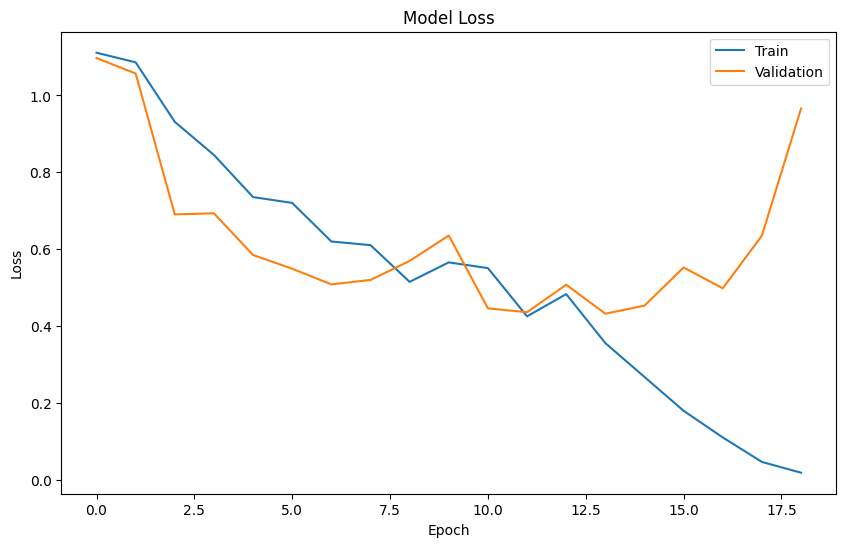

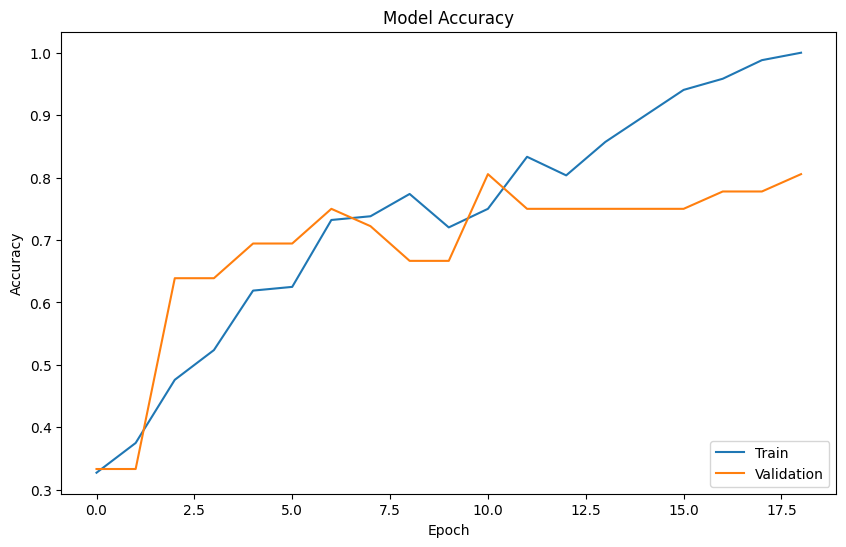

In [89]:
from utils.graph_plotter import plot_accuracy, plot_loss
plot_loss(history)
plot_accuracy(history)

##### Testing the model

In [90]:
test_loss, test_accuracy = network.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

2/2 [==============================] - 0s 26ms/step - loss: 0.5215 - accuracy: 0.9167
Test Loss: 0.5215302109718323
Test Accuracy: 0.9166666865348816


### Saving and loading

In [ ]:
MODEL_NAME = "base_line_v0"

#### History

In [ ]:
from utils.history_saver import save_history
save_history(history, MODEL_NAME)

In [ ]:
from utils.history_saver import load_history
history = load_history(MODEL_NAME)

#### Model

In [114]:
from utils.model_saver import save_model
save_model(network, MODEL_NAME)

INFO:tensorflow:Assets written to: ./saved_models/baseline_adam_model/assets


INFO:tensorflow:Assets written to: ./saved_models/baseline_adam_model/assets


In [ ]:
from utils.model_saver import load_model
network = load_model(MODEL_NAME)